<a href="https://colab.research.google.com/github/Chang365/ESAA-25-1-assignments/blob/main/ESAA_25_2_0922_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08 텍스트 분석
## NLP이냐 텍스트 분석이냐
- NLP: 머신이 인간의 언어를 이해하고 해석하는 데 중점을 두고 기술이 발전
- 텍스트 분석(텍스트 마이닝): 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 더 중점
1. 텍스트 분류: 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법
2. 감성 분석: 텍스트에 나타나는 주관적인 요소를 분석하는 기법
3. 텍스트 요약: 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법
4. 텍스트 군집화와 유사도 측정: 비슷한 유형의 문서에 대해 군집화를 수행하는 기법

## 텍스트 분석의 이해
- 텍스트를 word기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같
은 숫자 값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현될 수 있는데, 이렇게 텍스트를 변환하
는 것을 피처 벡터화 또는 피처 추출이라고 한다.

### 텍스트 분석 수행 프로세스
1. 텍스트 사전 준비작업(전처리)
2. 피처/벡터화 추출: 로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당
3.  ML 모델 수립 및 학습/예측/평가

### 파이썬 기반의 NLP, 텍스트 분석 패키지
- NLTK(Natural Language Toolkit for Python)： 파이썬의 가장 대표적인 NLP 패키지. NLP의 거의 모든 영역을 커버하고 있습니다. 많은 NLP 패키지가 NLTK의 영향을 받아 작성. 수행 속도 아쉬움
- Gensim： 토픽 모델링 분야에서 가장 두각을 나타내는 패키지. 오래전부터 토픽 모델링을 쉽게 구현할 수 있는 가능을 제
공해 왔으며, Word2Vec 구현. SpaCy와 함께 가장 많이 사용되는 NLP 패키지.
- SpaCy： 뛰어난 수행 성능으로 최근 가장 주목을 받는 NLP 패키지

## 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

- 텍스트 정규화는 텍스트를 머신러닝 알고리즘이나 NLP 애플리케이션에 입력 데이터로 사용하기 위해 클렌징, 정제, 토큰화, 어근화 등의 다양한 텍스트 데이터의 사전 작업을 수행하는 것

### 클렌징
- 텍스트에서 분석에 오히려 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업. HTML, XML 태그나 특정 기호 등을 사전에 제거

### 텍스트 토큰화
- 문장을 분리하는 문장 토큰화와 문장에서 단어를 토큰으로 분리하는 단어
토큰화
#### 문장 토큰화
- 마지막을 뜻하는 기호에 따라 분리


In [ ]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. You can see it out your window or on your television. You feel it when you go to work, or go to church or pay you taxes.'
sentences = sent_tokenize(text = text_sample)
print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay you taxes.']


#### 단어 토큰화
- 문장을 단어로 토큰화

In [ ]:
from nltk import word_tokenize

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [ ]:
def tokenize_text(text):
  sentences = sent_tokenize(text)
  word_tokenes = [word_tokenize(sentence) for sentence in sentences]
  return word_tokenes

word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'you', 'taxes', '.']]


- 단어별로 토큰화하면 문맥적인 의미 무시됨
-> n-gram: 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 내는

### 스톱워드 제거
- 분석에 큰 의미가 없는 단어

In [ ]:
import nltk
nltk.download('stopwords')

print('영어 stop words 개수: ', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수:  198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

for sentence in word_tokens:
  filtered_words = []

  for word in sentence:
    word = word.lower()
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### Stemming과 Lemmatization
- 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것
- Lemmatization이 Stemming보다 정교하며
의미론적인 기반에서 단어의 원형을 찾음
- Stemming: 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향
- Lemmatization: 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확
한 철자로 된 어근 단어를 찾아줌


In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


## Bag of Words - BOW
-  문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단
어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델

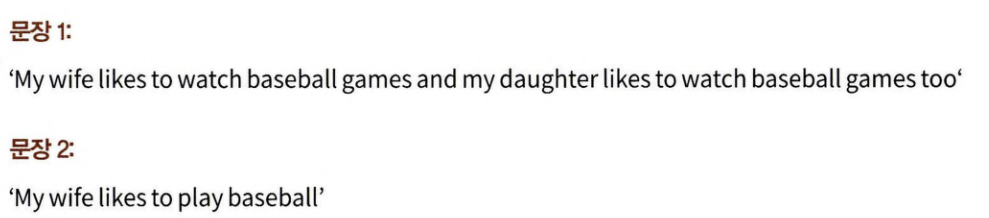

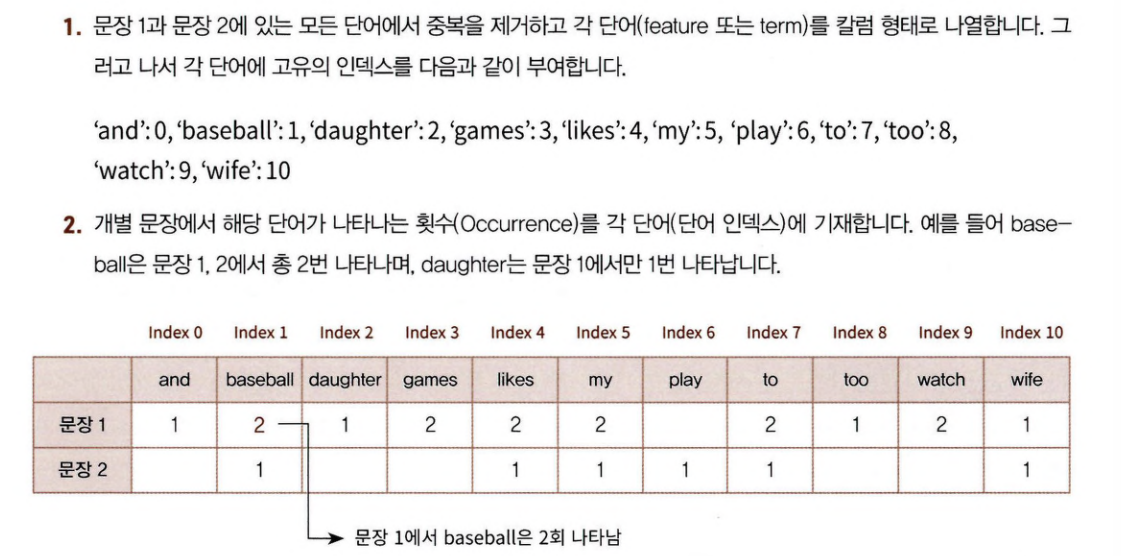

- BOW 모델의 장점은 쉽고 빠른 구축
- 단점
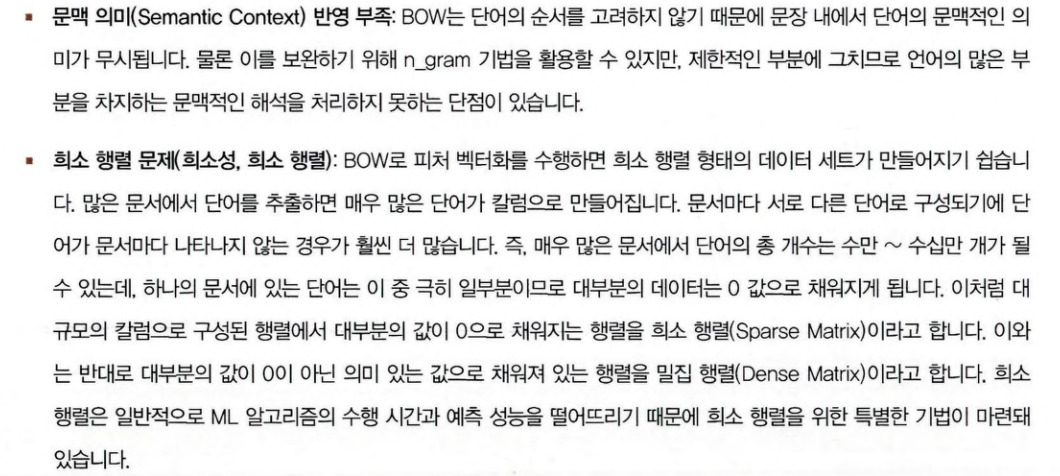

### BOW 피처 벡터화
- 텍스트는 특정 의미를 가지는 숫자
형 값인 벡터 값으로 변환해야 하는데, 이러한 변환을 피처 벡터화
- 기존 텍스트 데이터를 또 다른 형태의 피처의 조합으로 변경하기 때문에 넓은 범위
의 피처 추출에 포함
1. 카운트 기반의 벡터화: 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수
2. TF-IDF: 개별 문서에서 자주
나타나는 단어에 높은 가중치를 주되, 노든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식

### 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer

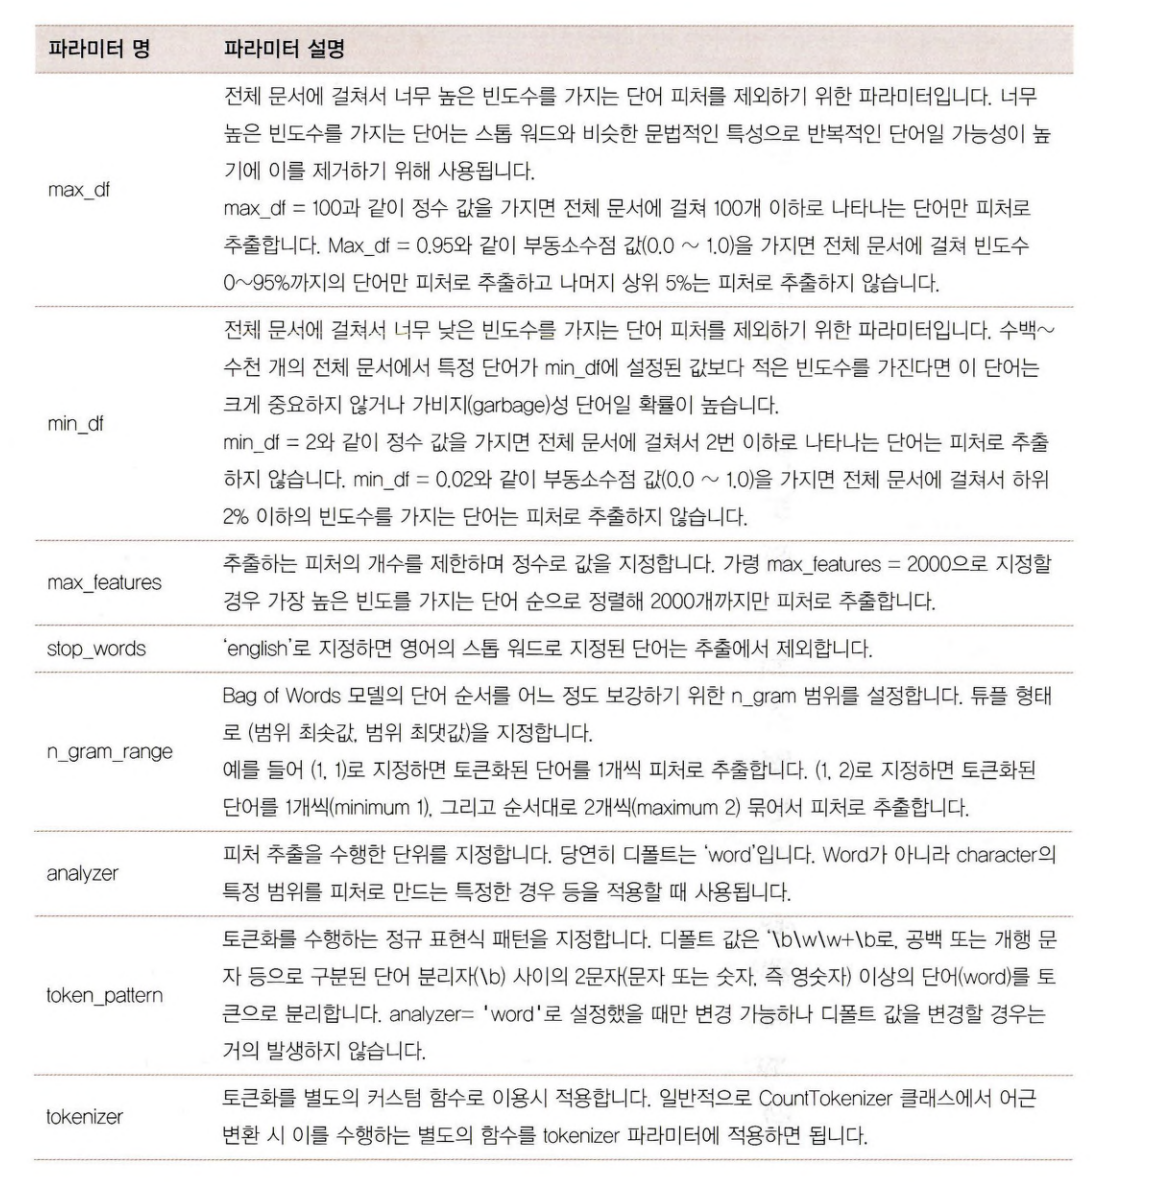

### BOW 벡터화를 위한 희소 행렬
- 희소 행렬은 너무 많은 불필요한 0 값이 메모리 공간에 할당되어 메모•리 공간이 많이 필요하며, 행렬의 크기가 커서 연산 시에도 데이터 액세스를 위한 시간이 많이 소모
- 이러한 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환해야 하는데, 대표적인 방법으로 COO 형식과 CSR 형식


### 희소 행렬 - COO 형식
- 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식

In [8]:
import numpy as np

dense = np.array([[3, 0, 1], [0, 2, 0]])

from scipy import sparse

data = np.array([3, 1, 2])

row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

### 희소 행렬 - CSR 형식
- COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

In [9]:
dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [0, 0, 0, 7, 0, 8],
                   [1, 0, 0, 0, 0, 0]])

data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
